
# **Conclusion**

<a name="Dataset"></a>
## Dataset


> Used Cars
<p><img alt="Colaboratory logo" height="55px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/GAZ-24_Volga.svg/640px-GAZ-24_Volga.svg.png" align="left" hspace="10px" vspace="0px"></p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/ann_used_cars.csv")
data.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


<a class="anchor" id="first-bullet"></a>
<img src="https://i.ibb.co/nzdQxG1/car.png" alt="Drawing" style="width: 600px;"/>

In [ ]:
#! pip install scikeras[tensorflow]

In [ ]:
data = pd.get_dummies(data)
data.head()

,year,price,mileage,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,2011,21992,7413,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,2011,20995,10926,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,2011,19995,7351,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,2011,17809,11613,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,2012,17500,8367,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=1)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

<h1> Normalizing </h1>
<a href="https://ibb.co/BsC7CgQ"><img src="https://i.ibb.co/ThgngH7/zscore.png" alt="zscore" border="0"></a>

In [ ]:
# Z-score Normalizing
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_val = preprocessing.scale(X_val)
X_test = preprocessing.scale(X_test)

<h1> Hyperparameter Tuning </h1>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/W3WZC8d/tune.png" alt="tune" border="0"></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier,KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

Define the grid search parameters


In [ ]:
batch_size=[10,100]
epochs=[10,100]
hidden_unit1= [1,64]
hidden_unit2 = [1,64]
optimizer = ["SGD","Adam"]

hyperparameters = dict(
                       batch_size = batch_size,
                       epochs=epochs,
                       hidden_unit1=hidden_unit1,
                       hidden_unit2=hidden_unit2,
                       optimizer=optimizer
                       )

In [ ]:
hyperparameters

{'batch_size': [10, 100],
 'epochs': [10, 100],
 'hidden_unit1': [1, 64],
 'hidden_unit2': [1, 64],
 'optimizer': ['SGD', 'Adam']}

Function to create model, required for KerasClassifier

In [ ]:
def create_model(hidden_unit1,hidden_unit2,optimizer='Adam'):
  model = tf.keras.Sequential()
  model.add(InputLayer(input_shape=X_train.shape[1]))
  model.add(Dense(hidden_unit1, activation = 'relu'))
  model.add(Dense(hidden_unit2, activation = 'relu'))
  model.add(Dense(1, activation='relu'))
  #optimizer = optimizer()
  model.compile(loss='mean_squared_error', optimizer = optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

Wrap model so it can be used by scikit-learn


In [ ]:
neural_network = KerasRegressor(build_fn=create_model,hidden_unit1=hidden_unit1,hidden_unit2=hidden_unit2, optimizer=optimizer,batch_size = batch_size,epochs=epochs)

Conduct Grid Search

In [ ]:
# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, n_jobs=-1, cv=5)

# Fit grid search
grid_result = grid.fit(X_train, y_train)

Epoch 1/100
12/12 [==============================] - 2s 4ms/step - loss: 176739168.0000 - mean_squared_error: 176739168.0000
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 176708528.0000 - mean_squared_error: 176708528.0000
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 176669296.0000 - mean_squared_error: 176669296.0000
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 176617424.0000 - mean_squared_error: 176617424.0000
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 176542688.0000 - mean_squared_error: 176542688.0000
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 176444976.0000 - mean_squared_error: 176444976.0000
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 176308496.0000 - mean_squared_error: 176308496.0000
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 176138272.0000 - mean_squared_error: 176138272.0000


In [ ]:
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-17.030560 (4.402379) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 1, 'hidden_unit2': 1, 'optimizer': 'SGD'}
-17.031074 (4.402269) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 1, 'hidden_unit2': 1, 'optimizer': 'Adam'}
-17.028181 (4.399918) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 1, 'hidden_unit2': 64, 'optimizer': 'SGD'}
-17.028485 (4.400870) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 1, 'hidden_unit2': 64, 'optimizer': 'Adam'}
-17.024312 (4.394421) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 64, 'hidden_unit2': 1, 'optimizer': 'SGD'}
-17.026985 (4.404170) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 64, 'hidden_unit2': 1, 'optimizer': 'Adam'}
-16.952920 (4.377591) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 64, 'hidden_unit2': 64, 'optimizer': 'SGD'}
-16.951229 (4.375440) with: {'batch_size': 10, 'epochs': 10, 'hidden_unit1': 64, 'hidden_unit2': 64, 'optimizer': 'Adam'}
-17.021218 (4.404427) with: {'batch_

<a name="Training"></a>
## Training


<a href="https://ibb.co/qntkSS8"><img src="https://i.ibb.co/n0HzGGy/gd.png" height="250px" alt="gd" border="0"></a>

In [ ]:
# Fitting the model with the best set of identified parameters
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(grid_result.best_params_['hidden_unit1'], activation = 'relu'))
model.add(Dense(grid_result.best_params_['hidden_unit2'], activation = 'relu'))
model.add(Dense(1, activation='relu', bias_initializer=tf.keras.initializers.Ones()))

model.compile(loss='mean_squared_error', optimizer= grid_result.best_params_['optimizer'], metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train, y_train,  batch_size = grid_result.best_params_['batch_size'], epochs = grid_result.best_params_['epochs'], verbose = 1, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 176719328.0000 - mean_squared_error: 176719328.0000 - val_loss: 189247296.0000 - val_mean_squared_error: 189247296.0000
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 176684816.0000 - mean_squared_error: 176684816.0000 - val_loss: 189211408.0000 - val_mean_squared_error: 189211408.0000
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 176645792.0000 - mean_squared_error: 176645792.0000 - val_loss: 189166144.0000 - val_mean_squared_error: 189166144.0000
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 176594224.0000 - mean_squared_error: 176594224.0000 - val_loss: 189105440.0000 - val_mean_squared_error: 189105456.0000
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 176523328.0000 - mean_squared_error: 176523328.0000 - val_loss: 189021872.0000 - val_mean_squared_error: 189021872.0000
Epoch 6/100
12/12 [===============

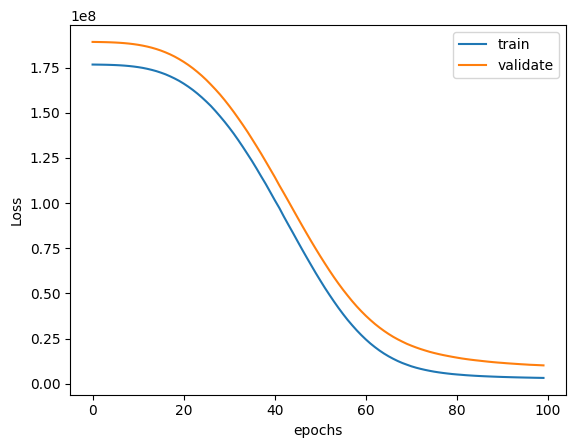

In [ ]:
# Plot Learning Curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print('Predicted Values', y_pred[0:5].round().tolist())
print('Actual Values', y_test[0:5].tolist())

1/1 [==============================] - 0s 117ms/step
Predicted Values [[8991.0], [11779.0], [12387.0], [12380.0], [14475.0]]
Actual Values [12992, 14990, 14677, 13663, 15999]


In [ ]:
# Accuracy (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2771.9568745623455